<h1> Final Project Data Analyst </h1>

# Library

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data Understanding

# Dataset

Dataset yang digunakan adalah dataset Customer Shopping Dataset dari Istanbul : https://www.kaggle.com/datasets/mehmettahiraslan/customer-shopping-dataset

Dengan Komponen variabel-variabelnya berisikan:

1. invoice_no: Nomor faktur. Nominal. Kombinasi huruf 'I' dan angka 6 digit yang secara unik diberikan untuk setiap transaksi.
2. customer_id: Nomor pelanggan. Nominal. Kombinasi huruf 'C' dan angka 6 digit yang secara unik diberikan untuk setiap transaksi.
3. gender: Variabel string yang menunjukkan jenis kelamin pelanggan.
4. age: Variabel bilangan bulat positif yang menunjukkan usia pelanggan.
5. category: Variabel string yang menunjukkan kategori produk yang dibeli.
6. quantity: Jumlah setiap produk (item) per transaksi. Numerik.
7. price: Harga satuan. Numerik. Harga produk per unit dalam Lira Turki (TL).
8. payment_method: Variabel string yang menunjukkan metode pembayaran (tunai, kartu kredit, atau kartu debit) yang digunakan dalam transaksi.
9. invoice_date: Tanggal faktur. Tanggal ketika transaksi dibuat.
10. shopping_mall: Variabel string yang menunjukkan nama pusat perbelanjaan tempat transaksi dilakukan.


In [7]:
df = pd.read_csv('customer_shopping_data.csv')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [8]:
len(df)

99457

Jumlah keseluruhan baris data sebanyak 99457 baris data.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


Interpret:
- Tidak ada indikasi missing value, namun perlu kita cek nanti missing value pada EDA.
- Semua variabel-variabelnya sudah sesuai, kecuali **invoice_date** karena object, maka kita perlu mengubahnya menjadi date time.

## Pengubahan Datetime pada Invoice_date

In [10]:
# string to datetime
# Ubah semua ke format MM/DD/YYYY
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True).dt.strftime('%m/%d/%Y')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,08/05/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,11/09/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,05/16/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,10/24/2021,Kanyon


In [11]:
# ubah ke datetime
# Ubah ke datetime setelah format MM/DD/YYYY
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   invoice_no      99457 non-null  object        
 1   customer_id     99457 non-null  object        
 2   gender          99457 non-null  object        
 3   age             99457 non-null  int64         
 4   category        99457 non-null  object        
 5   quantity        99457 non-null  int64         
 6   price           99457 non-null  float64       
 7   payment_method  99457 non-null  object        
 8   invoice_date    99457 non-null  datetime64[ns]
 9   shopping_mall   99457 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.6+ MB


Interpret:
- Case datetime sudah terubah dari object menjadi datetime64 tipe datanya. Sehingga bisa lanjut analisisnya.

# Business Problem + Goals

Kita ingin tau permasalahan yang utama dari data ini. Coba kita lihat tren datanya seperti apa:

- Tren jumlah Pelanggan periodiknya
- Tren Total Revenue periodiknya

## Tren Revenue Secara Periodik

In [13]:
# Total Revenue
df['total_revenue'] = df['quantity'] * df['price']
df.head(100)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_revenue
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40
...,...,...,...,...,...,...,...,...,...,...,...
95,I172458,C277842,Female,19,Clothing,2,600.16,Debit Card,2021-12-17,Cevahir AVM,1200.32
96,I297270,C183011,Male,62,Clothing,5,1500.40,Credit Card,2022-12-31,Metropol AVM,7502.00
97,I153930,C567813,Male,39,Food & Beverage,3,15.69,Cash,2022-08-09,Forum Istanbul,47.07
98,I282854,C282974,Female,33,Clothing,3,900.24,Cash,2022-07-31,Kanyon,2700.72


In [14]:
df_monthly_revenue = df.groupby(pd.to_datetime(df['invoice_date']).dt.to_period('M').astype(str))['total_revenue'].sum().reset_index()
df_monthly_revenue

,invoice_date,total_revenue
0,2021-01,9641614.62
1,2021-02,8772315.22
2,2021-03,9455359.38
3,2021-04,9389541.54
4,2021-05,9771756.97
5,2021-06,9286271.35
6,2021-07,10311119.68
7,2021-08,9630655.70
8,2021-09,9188165.62
9,2021-10,10263015.06


## Tren jumlah Pelanggan Secara Periodik

In [15]:
# Hitung jumlah pelanggan per bulan
df_monthly_pelanggan = df.groupby(pd.to_datetime(df['invoice_date']).dt.to_period('M').astype(str))['customer_id'].nunique().reset_index()
df_monthly_pelanggan

,invoice_date,customer_id
0,2021-01,3835
1,2021-02,3407
2,2021-03,3813
3,2021-04,3724
4,2021-05,3848
5,2021-06,3783
6,2021-07,3984
7,2021-08,3723
8,2021-09,3670
9,2021-10,3916


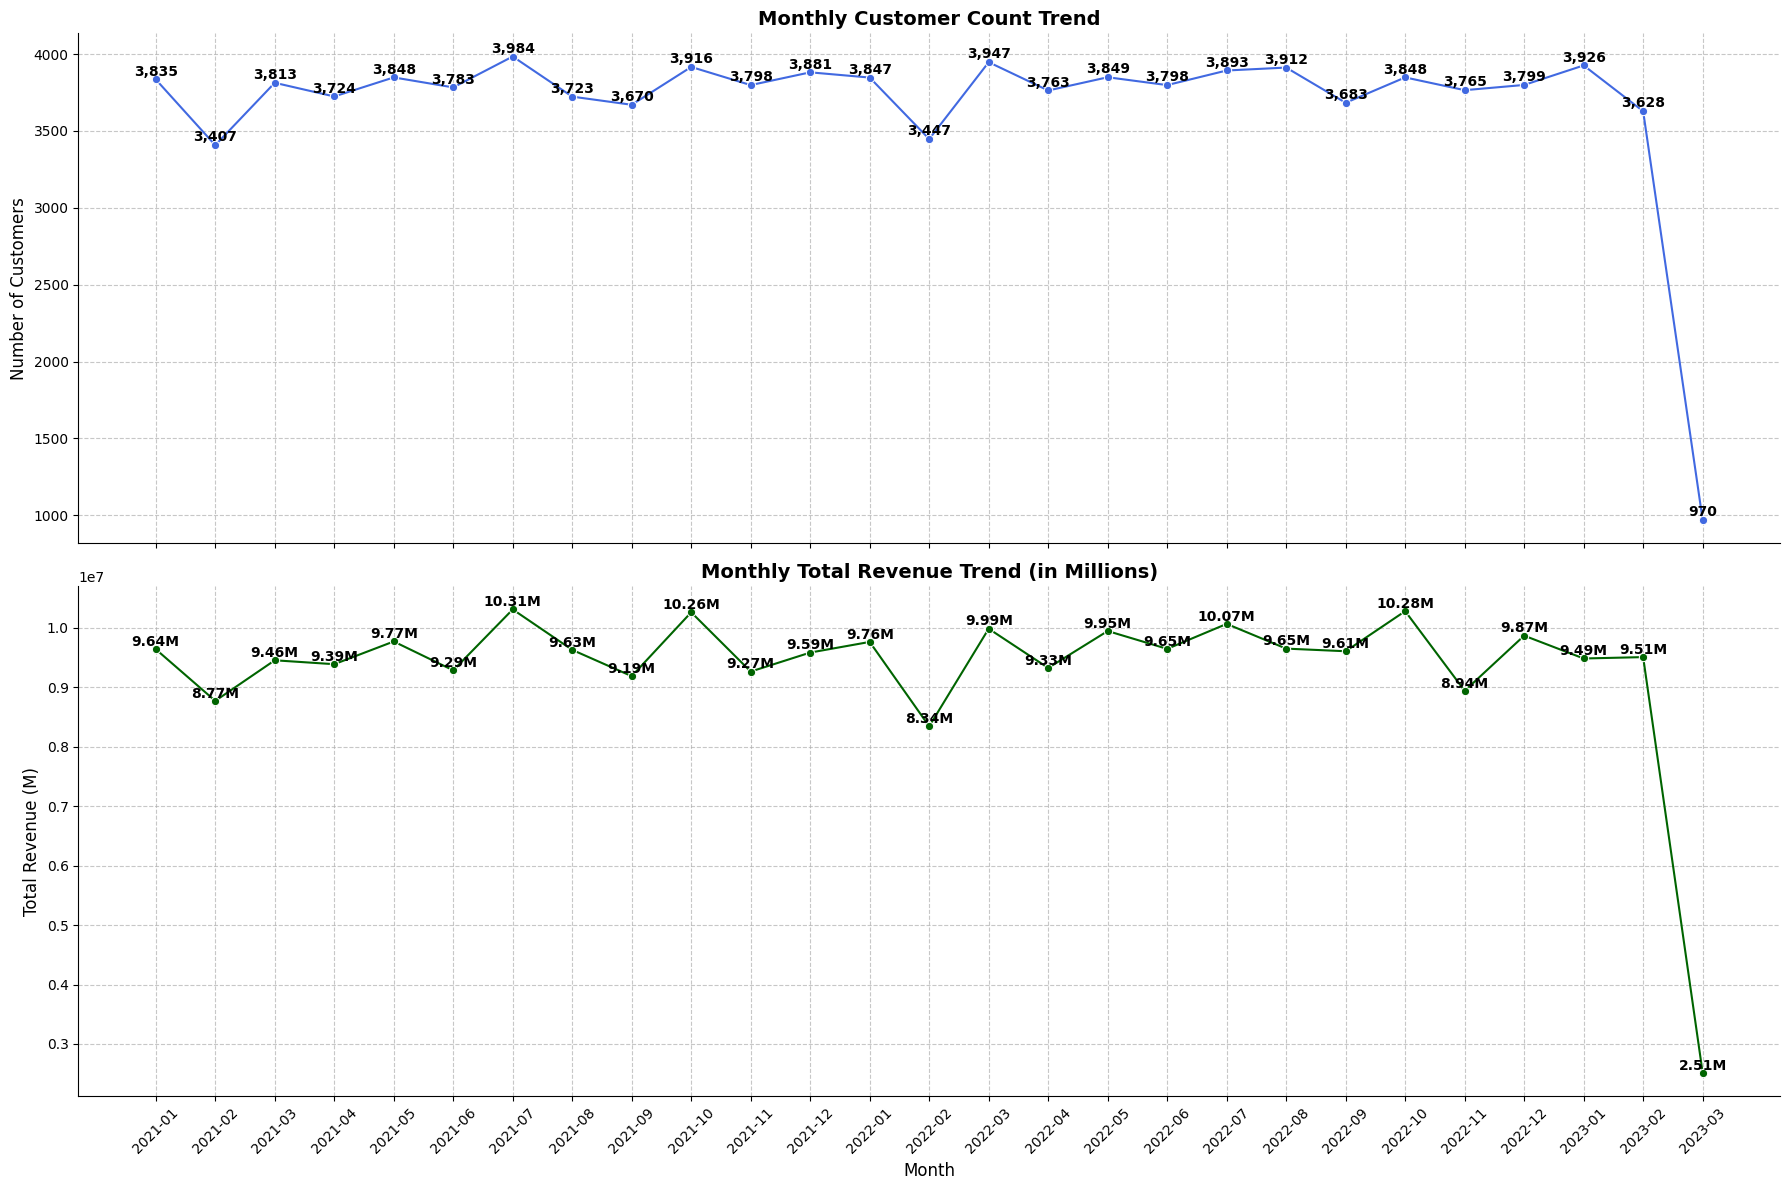

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create two plots in two rows
fig, axes = plt.subplots(2, 1, figsize=(18, 12), sharex=True)

# Plot number of customers per month
sns.lineplot(ax=axes[0], x='invoice_date', y='customer_id', data=df_monthly_pelanggan, marker='o', color='royalblue')
for i, row in df_monthly_pelanggan.iterrows():
    axes[0].text(row['invoice_date'], row['customer_id'] + 5, f"{row['customer_id']:,}",
                 color='black', ha='center', va='bottom', fontweight='bold')
axes[0].set_title('Monthly Customer Count Trend', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Month', fontsize=12)
axes[0].set_ylabel('Number of Customers', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, linestyle='--', alpha=0.7)

# Plot total revenue per month
sns.lineplot(ax=axes[1], x='invoice_date', y='total_revenue', data=df_monthly_revenue, marker='o', color='darkgreen')
for i, row in df_monthly_revenue.iterrows():
    revenue_m = row['total_revenue'] / 1_000_000  # Convert to million (M)
    axes[1].text(row['invoice_date'], row['total_revenue'] + 5_000, f"{revenue_m:.2f}M",
                 color='black', ha='center', va='bottom', fontweight='bold')
axes[1].set_title('Monthly Total Revenue Trend (in Millions)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Total Revenue (M)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
sns.despine()
plt.show()


Insight:

Dari grafik yang ditampilkan, terlihat adanya penurunan drastis dalam total pendapatan dan jumlah transaksi sejak awal tahun 2023. Sebelumnya, revenue bisnis ini stabil di kisaran **10 juta+-**, tetapi tiba-tiba merosot hingga hanya **2,51 juta** di akhir 2023!. Tak hanya itu, jumlah pelanggan yang sebelumnya mencapai **3000+ pelanggan** per bulan, kini turun drastis hingga hanya **970 pelanggan** di akhir 2023.

## Breakdown Berdasarkan Shopping Mall

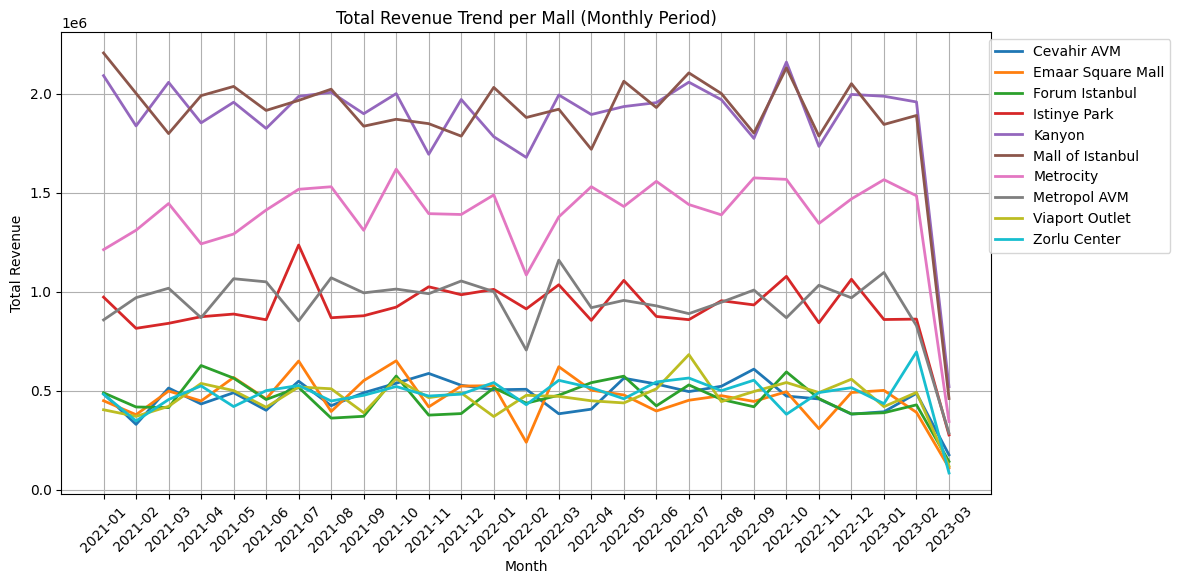

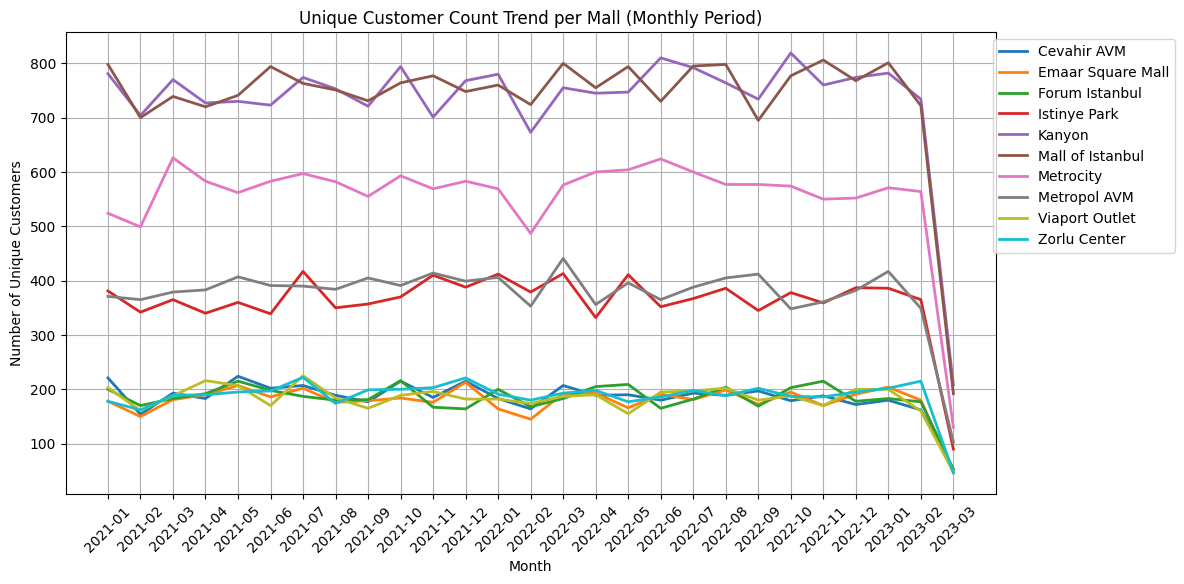

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert invoice_date to datetime format
df["invoice_date"] = pd.to_datetime(df["invoice_date"])
df["Month"] = df["invoice_date"].dt.to_period("M")

# Revenue
monthly_revenue = df.groupby(["Month", "shopping_mall"])["total_revenue"].sum().reset_index()
pivot_revenue = monthly_revenue.pivot(index="Month", columns="shopping_mall", values="total_revenue")

# Unique Customers
monthly_customers = df.groupby(["Month", "shopping_mall"])["customer_id"].nunique().reset_index()
pivot_customers = monthly_customers.pivot(index="Month", columns="shopping_mall", values="customer_id")

# Plot Revenue
plt.figure(figsize=(12, 6))
for mall in pivot_revenue.columns:
    plt.plot(pivot_revenue.index.astype(str), pivot_revenue[mall], label=mall, linewidth=2)

plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.title("Total Revenue Trend per Mall (Monthly Period)")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.show()

# Plot Customers
plt.figure(figsize=(12, 6))
for mall in pivot_customers.columns:
    plt.plot(pivot_customers.index.astype(str), pivot_customers[mall], label=mall, linewidth=2)

plt.xticks(rotation=45)
plt.xlabel("Month")
plt.ylabel("Number of Unique Customers")
plt.title("Unique Customer Count Trend per Mall (Monthly Period)")
plt.legend(loc="upper right", bbox_to_anchor=(1.2, 1))
plt.grid(True)
plt.show()


Interpret:

Dalam kurun waktu 2021 hingga awal 2023, tren jumlah pelanggan unik dan total revenue dari berbagai mall menunjukkan *pola yang cukup konsisten dengan beberapa fluktuasi yang mencolok*. Mall besar seperti **Mall of Istanbul dan Kanyon** secara konsisten memiliki jumlah pelanggan terbanyak serta pendapatan tertinggi, sering kali mencapai lebih dari **2 juta** dalam revenue per bulan. **Metrocity** juga menunjukkan performa yang kuat dengan jumlah pelanggan yang cukup tinggi serta pendapatan yang stabil di kisaran **1,5 juta**. Sementara itu, mall kelas menengah seperti **Istinye Park dan Metrovol AVM** memiliki jumlah pelanggan serta pendapatan yang berada di kisaran menengah, dengan beberapa lonjakan pada periode tertentu.

Di sisi lain, mall dengan skala lebih kecil seperti **Viaport Outlet, Emaar Square Mall, Cevahir AVM, Forum Istanbul, dan Zorlu Center** memiliki jumlah pelanggan yang lebih rendah, dengan pendapatan yang jarang melebihi **600 ribu per bulan**. Beberapa mall mengalami fluktuasi tajam pada waktu tertentu, yang kemungkinan besar disebabkan oleh periode belanja populer seperti diskon besar atau hari raya.

Namun, satu pola yang sangat mencolok adalah *penurunan drastis pada bulan Maret 2023*, baik dalam jumlah pelanggan maupun total revenue di semua mall. Fenomena ini mengindikasikan adanya faktor eksternal yang signifikan, seperti kebijakan ekonomi baru, perubahan tren belanja, atau bahkan kejadian luar biasa yang memengaruhi seluruh sektor ritel. Secara keseluruhan, tren ini menunjukkan bahwa mall-mall besar tetap dominan dalam menarik pelanggan dan menghasilkan pendapatan, sementara mall yang lebih kecil harus menghadapi tantangan dalam mempertahankan performa mereka di tengah perubahan kondisi pasar.

**Faktor Tertinggi:**

- Bisa jadi kedua mall ini memiliki daya tarik lebih besar, seperti lokasi strategis, tenant premium, atau pengalaman belanja yang lebih menarik dibandingkan mall lainnya.
- Mungkin terdapat promosi atau event tertentu yang meningkatkan kunjungan dan transaksi pelanggan di mall-mall tersebut.
- Faktor lain seperti aksesibilitas yang lebih baik atau adanya brand terkenal yang tidak tersedia di mall lain juga bisa menjadi alasan.


**Faktor untuk Terendah:**

- Beberapa mall mungkin mengalami penurunan preferensi dari pelanggan, entah karena kurangnya inovasi, tenant yang kurang menarik, atau berkurangnya daya beli masyarakat di area sekitar mall tersebut.
- Bisa jadi ada persaingan yang lebih ketat dari e-commerce atau marketplace online, sehingga pelanggan lebih memilih belanja secara online dibandingkan datang langsung ke mall.

## Landasan Business Problem dan Goalsnya:

<h4>Apakah ini tanda pelanggan mulai meninggalkan bisnis ini? Atau ada faktor-faktor lain yang menyebabkan penurunan pada bisnis ini ?<h4>



- Penurunan revenue dan jumlah pelanggan sejak awal 2023 dapat disebabkan oleh perubahan perilaku pelanggan, mungkin apa karena persaingan kompetitor dari suatu bisnis yang serupa untuk Istanbul Store ini ? atau memang ada pergeseran preferensi pelanggan tertentu ? atau pelanggan kurang tertarik dengan produk ini ?

- Dilihat juga pada breakdown, ya secara keseluruhan tahun 2023 mengalami penurunan baik revenue ataupun jumlah pelanggan. Namun, secara gap dari per jenis shopping mallnya cukup berbeda signifikan, dimana Mall Kanyoon dan Mall Istandbul yang tertinggi. Hal ini, pasti cenderung berpikir apakah persaingan kompetitor ? atau produk-produknya kurang menarik di mall selain kedua itu? atau dari segi harganya relatif murah atau mahal ? atau memang ada kecenderungan preferensi lain dari pelanggan tertentu ?



Untuk mengatasi hal ini, dilakukan Customer Segmentation menggunakan metode cluistering yang mirip RFM yaitu secara **Demografis** dalam kasus Istanbul Store guna memahami pola belanja pelanggan (segmentasi pelanggan seperti apa), mengantisipasi penurunan lebih lanjut, serta menemukan strategi penjualan yang lebih efektif.


- **Tujuan utamanya** adalah mengidentifikasi segmen pelanggan berdasarkan sisi demografisnya, menyusun strategi retensi dan win-back campaign, serta memahami pola pembelian untuk mengoptimalkan penawaran produk.
- Selain itu, analisis ini **diharapkan** untuk meningkatkan customer experience dan brand engagement melalui komunikasi yang lebih personal serta mengoptimalkan strategi produk dan promosi, dengan memaksimalkan penjualan produk unggulan dan meningkatkan daya tarik produk dengan performa rendah.

# Feature Engineering

Adapun pada tahapan feature engineering ini berkaitan dengan:
-  **Pembersihan data** untuk mengecek/menghandling data yang terindikasi missing value. Tidak dilakukan outlier/handling karena bukan ranah prediksi/metode, dan juga ini ranahnya segmentasi pelanggan, jikalau dilakukan handling outlier ditakutkan banyak kehilangan informasi penting yang bagus untuk strategi pelanggan dan perusahaan

- **Manipulasi Data** untuk membuat formula-formula pada kolom dataset Istanbul Store yang berguna pada sisi segmentasi **Demografis**, seperti pengkategorian usia, jenis payment digunakan, jenis pelanggan berdasarkan penjualan, dan lainnya yang nantinya siap digunakan visualisasi dashboard menggunakan Power BI.

## Data Cleaning

### Missing Value

In [18]:
# Cek missing value
df.isna().sum()

,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,0
payment_method,0
invoice_date,0
shopping_mall,0


Interpret:
- Dicek missing valuenya mengindikasikan bahwa keseluruhan kolom-kolom atau variabel **tidak ada yang datanya null atau hilang** (Data sudah lengkap). Sehingga, **tidak perlu** dilakukan handling missing value

### Cek Duplikasi

In [19]:
jumlah_duplikat = df.duplicated().sum()
print(f"Jumlah duplikasi: {jumlah_duplikat}")

Jumlah duplikasi: 0


Interpret:

karena tidak ada duplikat maka tidak perlu dilakukan drop duplikasi padda dataset

### Cek Value Data Aneh (Minus atau Kategori Aneh)

In [20]:
# Cek apakah ada nilai negatif di Quantity atau Price
ada_negatif = (df['quantity'] < 0) | (df['price'] < 0)

# Menampilkan baris yang memiliki nilai negatif
df_negatif = df[ada_negatif]
print(df_negatif)

Empty DataFrame
Columns: [invoice_no, customer_id, gender, age, category, quantity, price, payment_method, invoice_date, shopping_mall, total_revenue, Month]
Index: []


Interpret:

Karena tidak ada value data aneh, misalnya minus, maka tidak perlu dilakukan drop data aneh

In [21]:
kolom = ['gender','category','age','payment_method','shopping_mall']

for i in kolom:
  cek_kolom = df[i].value_counts().reset_index()
  print(cek_kolom)

   gender  count
0  Female  59482
1    Male  39975
          category  count
0         Clothing  34487
1        Cosmetics  15097
2  Food & Beverage  14776
3             Toys  10087
4            Shoes  10034
5         Souvenir   4999
6       Technology   4996
7            Books   4981
    age  count
0    37   2057
1    22   2051
2    64   2002
3    43   2000
4    51   1993
5    30   1981
6    24   1977
7    40   1960
8    48   1955
9    36   1954
10   38   1954
11   28   1953
12   27   1950
13   21   1947
14   39   1947
15   52   1945
16   61   1945
17   19   1936
18   56   1916
19   33   1913
20   46   1911
21   62   1909
22   44   1904
23   53   1903
24   69   1901
25   67   1901
26   23   1897
27   26   1896
28   68   1893
29   42   1892
30   41   1892
31   32   1891
32   63   1886
33   29   1885
34   34   1883
35   49   1883
36   47   1880
37   57   1879
38   66   1876
39   45   1876
40   58   1875
41   59   1874
42   60   1874
43   50   1873
44   31   1866
45   25   1863
46   65   

Interpret:

Tidak ada isi value yang aneh juga pada setiap kolom vairabel-variabel.
Sehingga, dari keseluruhan proses data cleaning sudah aman. dan lanjut ke analisis **Data Manipulation**

In [22]:
f'Jumlah Total Data Bersih setelah dilakukan data cleaning sebanyak: {len(df)} data'

'Jumlah Total Data Bersih setelah dilakukan data cleaning sebanyak: 99457 data'

In [23]:
df.describe()

,age,quantity,price,invoice_date,total_revenue
count,99457.000000,99457.000000,99457.000000,99457,99457.000000
mean,43.427089,3.003429,689.256321,2022-02-04 02:46:59.783424,2528.789268
min,18.000000,1.000000,5.230000,2021-01-01 00:00:00,5.230000
25%,30.000000,2.000000,45.450000,2021-07-19 00:00:00,136.350000
50%,43.000000,3.000000,203.300000,2022-02-05 00:00:00,600.170000
75%,56.000000,4.000000,1200.320000,2022-08-22 00:00:00,2700.720000
max,69.000000,5.000000,5250.000000,2023-03-08 00:00:00,26250.000000
std,14.990054,1.413025,941.184567,NaN,4222.475781


Secara Statistik:

1. Pelanggan memiliki rentang usia yang luas, dengan mayoritas di sekitar 43 tahun.
2. Sebagian besar transaksi melibatkan 2-4 barang, dengan maksimum 5 barang per transaksi.
3. Harga barang sangat bervariasi, ada yang murah (5.23) dan ada yang sangat mahal (5250) satuan Turki Lira.
4. Pendapatan total per transaksi sangat bervariasi, dengan beberapa transaksi bernilai sangat tinggi.

Interpret Secara Bisnis:

1. Usia Pelanggan (Age)
Mayoritas pelanggan berada di rentang usia 30 hingga 56 tahun, dengan rata-rata sekitar 43 tahun. Ini menunjukkan bahwa produk atau layanan yang ditawarkan lebih banyak menarik perhatian dewasa muda hingga paruh baya, yang kemungkinan memiliki daya beli lebih stabil. Strategi pemasaran bisa difokuskan pada kelompok usia ini dengan pendekatan yang sesuai, seperti promosi di platform yang sering mereka gunakan atau menyesuaikan komunikasi pemasaran dengan preferensi mereka.

2. Jumlah Barang yang Dibeli per Transaksi (Quantity)
Sebagian besar pelanggan membeli antara 2 hingga 4 barang per transaksi, dengan jumlah maksimum 5 barang. Ini mengindikasikan bahwa pelanggan cenderung membeli dalam jumlah yang tidak terlalu besar, mungkin karena sifat produk yang lebih bersifat personal atau kebutuhan yang tidak dalam skala besar. Untuk meningkatkan nilai transaksi, bisnis bisa menawarkan program bundle pricing atau diskon pembelian dalam jumlah tertentu untuk mendorong pembelian dalam jumlah lebih banyak.

3. Harga Produk (Price)
Harga produk sangat bervariasi, mulai dari 5.23 hingga 5250 dengan rata-rata sekitar 689.26. Perbedaan harga yang signifikan ini bisa menunjukkan bahwa bisnis menawarkan berbagai jenis produk, mulai dari barang dengan harga terjangkau hingga produk premium. Jika target pasar cukup luas, bisnis bisa memanfaatkan segmentasi pelanggan untuk strategi pemasaran, misalnya dengan promosi eksklusif untuk produk premium dan diskon bagi pelanggan yang mencari produk dengan harga lebih rendah.

4. Pendapatan per Transaksi (Total Revenue)
Pendapatan dari setiap transaksi juga sangat bervariasi, dengan rata-rata sekitar 2.528,79 dan beberapa transaksi mencapai 26.250. Variasi yang besar ini menunjukkan adanya segmen pelanggan yang melakukan transaksi dalam jumlah besar atau membeli produk dengan harga tinggi. Bisnis dapat menganalisis profil pelanggan dengan transaksi tinggi untuk memahami kebutuhan mereka dan memberikan strategi khusus, seperti program loyalty atau personalisasi penawaran untuk meningkatkan retensi pelanggan.

## Data Manipulation

### Membuat Segmentasi Demografi, misalnya, Usia, Jenis Payment yang digunakan, dan kategori tingkat pendapatan tiap pelanggan

#### Usia

In [24]:
# Fungsi untuk mengkategorikan usia
def categorize_age(age):
    if age < 20:
        return "Remaja"
    elif 20 <= age <= 50:
        return "Dewasa"
    else:
        return "Tua"

# Tambahkan kolom kategori usia
df['Kategori_Umur'] = df['age'].apply(categorize_age)

# Tampilkan hasil
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_revenue,Month,Kategori_Umur
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00,2022-08,Dewasa
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,2021-12,Dewasa
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08,2021-11,Dewasa
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,2021-05,Tua
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,2021-10,Tua
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,293.25,2022-09,Dewasa
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,20.92,2021-09,Dewasa
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,20.92,2021-03,Tua
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,16800.00,2021-03,Tua


#### Revenue

In [25]:
# Fungsi untuk mengkategorikan usia
def categorize_revenue(revenue):
    if revenue < 10000:
        return "Rendah Revenue"
    elif 10000 <= revenue <= 20000:
        return "Sedang Revenue"
    else:
        return "Tinggi Revenue"

# Tambahkan kolom kategori usia
df['Kategori_Pelanggan_Revenue'] = df['total_revenue'].apply(categorize_revenue)

# Tampilkan hasil
df

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_revenue,Month,Kategori_Umur,Kategori_Pelanggan_Revenue
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00,2022-08,Dewasa,Rendah Revenue
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,2021-12,Dewasa,Rendah Revenue
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08,2021-11,Dewasa,Rendah Revenue
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,2021-05,Tua,Sedang Revenue
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,2021-10,Tua,Rendah Revenue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,293.25,2022-09,Dewasa,Rendah Revenue
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,20.92,2021-09,Dewasa,Rendah Revenue
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,20.92,2021-03,Tua,Rendah Revenue
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,16800.00,2021-03,Tua,Sedang Revenue


#### Membuat Wilayah/Distrik pada setiap Shopping Mall

In [26]:
def add_district_column(df, mall_column='shopping_mall'):
    # Dictionary mapping shopping mall ke distrik
    mall_to_district = {
        "Mall of Istanbul": "Başakşehir",
        "Kanyon": "Levent, Beşiktaş",
        "Metrocity": "Levent, Beşiktaş",
        "Metropol AVM": "Ataşehir",
        "Istinye Park": "Sarıyer",
        "Zorlu Center": "Beşiktaş",
        "Cevahir AVM": "Şişli",
        "Forum Istanbul": "Bayrampaşa",
        "Viaport Outlet": "Pendik",
        "Emaar Square Mall": "Üsküdar"
    }
    # Menambahkan kolom Distrik
    df['Distrik'] = df[mall_column].map(mall_to_district)

    return df

add_district_column(df)

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_revenue,Month,Kategori_Umur,Kategori_Pelanggan_Revenue,Distrik
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00,2022-08,Dewasa,Rendah Revenue,"Levent, Beşiktaş"
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,2021-12,Dewasa,Rendah Revenue,Bayrampaşa
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08,2021-11,Dewasa,Rendah Revenue,"Levent, Beşiktaş"
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,2021-05,Tua,Sedang Revenue,Ataşehir
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,2021-10,Tua,Rendah Revenue,"Levent, Beşiktaş"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99452,I219422,C441542,Female,45,Souvenir,5,58.65,Credit Card,2022-09-21,Kanyon,293.25,2022-09,Dewasa,Rendah Revenue,"Levent, Beşiktaş"
99453,I325143,C569580,Male,27,Food & Beverage,2,10.46,Cash,2021-09-22,Forum Istanbul,20.92,2021-09,Dewasa,Rendah Revenue,Bayrampaşa
99454,I824010,C103292,Male,63,Food & Beverage,2,10.46,Debit Card,2021-03-28,Metrocity,20.92,2021-03,Tua,Rendah Revenue,"Levent, Beşiktaş"
99455,I702964,C800631,Male,56,Technology,4,4200.00,Cash,2021-03-16,Istinye Park,16800.00,2021-03,Tua,Sedang Revenue,Sarıyer


### Membuat Score untuk Segmentasi Pelanggan

In [27]:
# Fungsi scoring untuk Age
def age_score(age):
    if age < 20:
        return 1  # Remaja
    elif 20 <= age <= 50:
        return 2  # Dewasa
    else:  # age > 50
        return 3  # Tua

# Fungsi scoring untuk Revenue
def revenue_score(revenue):
    if revenue < 10000:
        return 1  # Rendah
    elif 10000 <= revenue <= 20000:
        return 2  # Sedang
    else:  # revenue > 20000
        return 3  # Tinggi

# Fungsi scoring untuk Payment Method
# Misalnya: Cash = 1, Debit Card = 2, Credit Card = 3
def payment_score(payment):
    payment = payment.lower()
    if payment == 'cash':
        return 1
    elif payment == 'debit card':
        return 2
    elif payment == 'credit card':
        return 3
    else:
        return 0  # Bila ada metode lain

df['Age_Score'] = df['age'].apply(age_score)
df['Revenue_Score'] = df['total_revenue'].apply(revenue_score)
df['Payment_Method_Score'] = df['payment_method'].apply(payment_score)

#Concat angka
df['Total_Score'] = df['Age_Score'].astype(str) + df['Revenue_Score'].astype(str) + df['Payment_Method_Score'].astype(str)
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_revenue,Month,Kategori_Umur,Kategori_Pelanggan_Revenue,Distrik,Age_Score,Revenue_Score,Payment_Method_Score,Total_Score
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00,2022-08,Dewasa,Rendah Revenue,"Levent, Beşiktaş",2,1,3,213
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,2021-12,Dewasa,Rendah Revenue,Bayrampaşa,2,1,2,212
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08,2021-11,Dewasa,Rendah Revenue,"Levent, Beşiktaş",2,1,1,211
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,2021-05,Tua,Sedang Revenue,Ataşehir,3,2,3,323
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,2021-10,Tua,Rendah Revenue,"Levent, Beşiktaş",3,1,1,311


In [28]:
# Scoring Segmentasi Pelanggan

def categorize_customer(usia, revenue, kartu):
    if (usia, revenue, kartu) in [(2, 3, 2), (3, 3, 2), (2, 3, 3), (3, 3, 3), (3, 3, 1), (2, 3, 1)]:
        return "High-Value Customers"
    elif (usia, revenue, kartu) in [(1, 2, 1), (1, 2, 2), (1, 2, 3), (2, 2, 1), (2, 2, 2), (2, 2, 3),
                                    (3, 2, 1), (3, 2, 2), (3, 2, 3), (1, 3, 1), (1, 3, 2), (1, 3, 3)]:
        return "Growing Customers"
    elif (usia, revenue, kartu) in [(1, 1, 2), (1, 1, 3), (2, 1, 2), (2, 1, 3), (3, 1, 2), (3, 1, 3)]:
        return "Casual Spenders"
    elif (usia, revenue, kartu) in [(1, 1, 1), (2, 1, 1), (3, 1, 1)]:
        return "Low-Engagement Customers"
    else:
        return "Unknown Category"

# Tambahkan kolom kategori berdasarkan fungsi
df["Kategori_Segmentasi_Pelanggan"] = df.apply(lambda row: categorize_customer(row["Age_Score"], row["Revenue_Score"], row["Payment_Method_Score"]), axis=1)

df.head()


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_revenue,Month,Kategori_Umur,Kategori_Pelanggan_Revenue,Distrik,Age_Score,Revenue_Score,Payment_Method_Score,Total_Score,Kategori_Segmentasi_Pelanggan
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,2022-08-05,Kanyon,7502.00,2022-08,Dewasa,Rendah Revenue,"Levent, Beşiktaş",2,1,3,213,Casual Spenders
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,2021-12-12,Forum Istanbul,5401.53,2021-12,Dewasa,Rendah Revenue,Bayrampaşa,2,1,2,212,Casual Spenders
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,2021-11-09,Metrocity,300.08,2021-11,Dewasa,Rendah Revenue,"Levent, Beşiktaş",2,1,1,211,Low-Engagement Customers
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,2021-05-16,Metropol AVM,15004.25,2021-05,Tua,Sedang Revenue,Ataşehir,3,2,3,323,Growing Customers
4,I337046,C189076,Female,53,Books,4,60.60,Cash,2021-10-24,Kanyon,242.40,2021-10,Tua,Rendah Revenue,"Levent, Beşiktaş",3,1,1,311,Low-Engagement Customers


Saya membuat kategori customer category dengan kriteria berikut:
- **High-Value Customers** (Score: 7-9 *dengan kriteria tertentu) -> Pelanggan dengan pengeluaran tinggi yang cenderung lebih matang (dewasa, remaja) dan menggunakan metode pembayaran yang lebih modern (kartu kredit/debit card/tunai). Mereka adalah target ideal untuk program loyalitas premium atau eksklusif.

- **Growing Customers** (Score: 5-6 *dengan kriteria tertentu) -> Pelanggan dengan pengeluaran menengah, sering dari kelompok usia muda hingga dewasa, dan lebih fleksibel dalam metode pembayaran. Namun, ada juga pengeluaran tinggi, dengan usia muda, dan metode pembayaran fleksibel. Mereka memiliki potensi untuk menjadi pelanggan bernilai tinggi jika diberikan insentif yang tepat.

- **Casual Spenders** (Score: 3-4 *dengan kriteria tertentu) -> Pelanggan dengan pengeluaran rendah, umumnya muda sampai dewasa, sering menggunakan pembayaran debit, atau kredit card. Mereka mungkin hanya membeli saat ada promo atau kebutuhan mendesak..

- **Low-Engagement** Customers (1-2 *dengan kriteria tertentu) -> Pelanggan dengan pengeluaran sangat rendah, biasanya menggunakan pembayaran tunai dan berasal dari kelompok usia yang kurang aktif berbelanja (sangat muda atau sangat tua). Mereka mungkin bukan target utama tetapi bisa ditingkatkan dengan penawaran yang lebih menarik.


*dengan kriteria tertentu : sudah saya golongkan dengan kriteria berdasarakan definisinya

Setelah membuat segmentasi pelanggan berdasarkan demografinya, maka kita simpan dan langsung dibuat dashboard terkait Istanbul Store dari hasil analisis di atas.

# Export Dataset

In [29]:
df.to_excel('customer_shopping_data_clean.xlsx', index=False)